# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [10]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [11]:
import requests,zipfile,io
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
r = requests.get(url,stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract('Salaries.csv')
z.extract('Teams.csv')
salariesDF = pd.read_csv('Salaries.csv')
teamsDF = pd.read_csv('Teams.csv')

print(salariesDF.iloc[0:1, : ])
teamsDF.iloc[0:1, : ]

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1


In [ ]:
salariesDF = pd.read_csv('Salaries.csv')
teamsDF = pd.read_csv('Teams.csv')

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [5]:
cols = ['yearID','teamID','lgID','salary']
sumSalariesDF = salariesDF[cols]
#sumSalariesDF.head()
#DF1985 = sumSalariesDF.groupby(['yearID']).get_group(1985)
#DF1985.groupby(['yearID','teamID','lgID'], as_index=False).agg({'salary' : np.sum})
years = np.linspace(1985,2013,29)
sumSalariesFinal = sumSalariesDF.iloc[0:0, : ]
for year in years:
    DFYear = sumSalariesDF.groupby(['yearID']).get_group(year)
    DFSumYear = DFYear.groupby(['yearID','teamID','lgID'], as_index=False).agg({'salary' : np.sum})
    sumSalariesFinal = sumSalariesFinal.append(DFSumYear, ignore_index=True)
sumSalariesFinal

,yearID,teamID,lgID,salary
0,1985,ATL,NL,14807000
1,1985,BAL,AL,11560712
2,1985,BOS,AL,10897560
3,1985,CAL,AL,14427894
4,1985,CHA,AL,9846178
5,1985,CHN,NL,12702917
6,1985,CIN,NL,8359917
7,1985,CLE,AL,6551666
8,1985,DET,AL,10348143
9,1985,HOU,NL,9993051


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [6]:
temp = teamsDF.loc[ : ,lambda df: ['yearID','teamID','lgID','DivWin','WCWin','LgWin','WSWin']]
teamsWinDF1 = temp[temp.yearID > 1984]
temp1 = teamsWinDF1.iloc[0:0,:]
teamsWinDF = temp1.append(teamsWinDF1,ignore_index=True)
salaryTeamWinDF = pd.merge(sumSalariesFinal,teamsWinDF,on=['yearID','teamID','lgID'])
salaryTeamWinDF

,yearID,teamID,lgID,salary,DivWin,WCWin,LgWin,WSWin
0,1985,ATL,NL,14807000,N,NaN,N,N
1,1985,BAL,AL,11560712,N,NaN,N,N
2,1985,BOS,AL,10897560,N,NaN,N,N
3,1985,CAL,AL,14427894,N,NaN,N,N
4,1985,CHA,AL,9846178,N,NaN,N,N
5,1985,CHN,NL,12702917,N,NaN,N,N
6,1985,CIN,NL,8359917,N,NaN,N,N
7,1985,CLE,AL,6551666,N,NaN,N,N
8,1985,DET,AL,10348143,N,NaN,N,N
9,1985,HOU,NL,9993051,N,NaN,N,N


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [124]:
#OaklandWinSalary = salaryTeamWinDF.groupby(['teamID']).get_group('OAK')

df = pd.DataFrame(np.zeros((828,1),int),columns=['TotalWin'])
salaryTeamTotalWinDF = pd.concat([salaryTeamWinDF,df], axis=1)
'''
temp1985 = salaryTeamWinDF.iloc[0:0,:]
temp = salaryTeamWinDF.groupby(['yearID']).get_group(1985)
temp1985 = temp1985.append(temp)
sorts = temp1985.sort_values(by=('salary'),ascending=False)
temp1985sort = salaryTeamWinDF.iloc[0:0,:]
temp1985sort.append(sorts,ignore_index=True)
'''
DFDiv = salaryTeamTotalWinDF['DivWin'] == 'Y'
DFDiv0 = DFDiv.replace(False, 0)
salaryTeamTotalWinDF['DivWin'] = DFDiv0

DFWC = salaryTeamTotalWinDF['WCWin'] == 'Y'
DFWC0 = DFWC.replace(False, 0)
salaryTeamTotalWinDF['WCWin'] = DFWC0

DFLg = salaryTeamTotalWinDF['LgWin'] == 'Y'
DFLg0 = DFLg.replace(False, 0)
salaryTeamTotalWinDF['LgWin'] = DFLg0

DFWS = salaryTeamTotalWinDF['WSWin'] == 'Y'
DFWS0 = DFWS.replace(False, 0)
salaryTeamTotalWinDF['WSWin'] = DFWS0

salaryTeamTotalWinDF['TotalWin'] = salaryTeamTotalWinDF.iloc[:,4:8].sum(axis=1)
salaryTeamTotalWinCleanDF = salaryTeamTotalWinDF[['yearID','teamID','salary','TotalWin']]
'''
temp1985 = salaryTeamTotalWinCleanDF.iloc[0:0,:]
temp = salaryTeamTotalWinCleanDF.groupby(['yearID']).get_group(1985)
temp1985 = temp1985.append(temp)
sorts = temp1985.sort_values(by=('salary'),ascending=False)
temp1985sort = salaryTeamTotalWinCleanDF.iloc[0:0,:]
STTWCDF = temp1985sort.append(sorts,ignore_index=True)

salaryTeamTotalWinCleanDFTemp = salaryTeamTotalWinCleanDF.copy()
salaryTeamTotalWinCleanDFTemp.index = salaryTeamTotalWinCleanDF['yearID']
salaryTeamTotalWinCleanDFTemp = salaryTeamTotalWinCleanDFTemp[['teamID','salary','TotalWin']]
'''
STTWCDF_year = salaryTeamTotalWinCleanDF.groupby(['yearID']).get_group(1985)
STTWCDFTemp = STTWCDF_year.copy()
STTWCDFTemp.index = STTWCDF_year['teamID']
STTWCDFTemp = STTWCDFTemp[['salary','TotalWin']]
'''
STTWCDFTemp['TotalWin'] = STTWCDFTemp['TotalWin']*(1e6)
STTWCDFTemp_transposed = STTWCDFTemp.T
STTWCDFTemp_transposed
STTWCDFTemp_transposed.plot.bar(y='OAK',rot=0)
STTWCDFTemp.plot.bar()
plt.show()
'''

'''
fig, axes = plt.subplots(2,1,figsize=(12,8))
axes[0].bar(STTWCDFTemp['teamID'].index,STTWCDFTemp['salary'])
axes[0].set_title('salary')

axes[1].bar(STTWCDFTemp['teamID'],STTWCDFTemp['TotalWin'])
axes[1].set_title('TotalWin')
'''

salaryTeamTotalWinCleanDF

,yearID,teamID,salary,TotalWin
0,1985,ATL,14807000,0.0
1,1985,BAL,11560712,0.0
2,1985,BOS,10897560,0.0
3,1985,CAL,14427894,0.0
4,1985,CHA,9846178,0.0
5,1985,CHN,12702917,0.0
6,1985,CIN,8359917,0.0
7,1985,CLE,6551666,0.0
8,1985,DET,10348143,0.0
9,1985,HOU,9993051,0.0


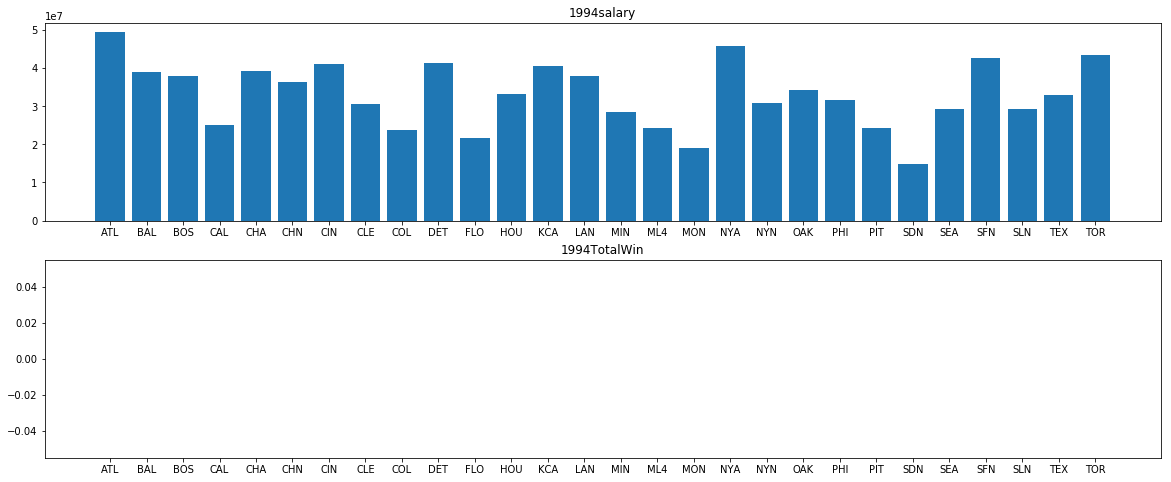

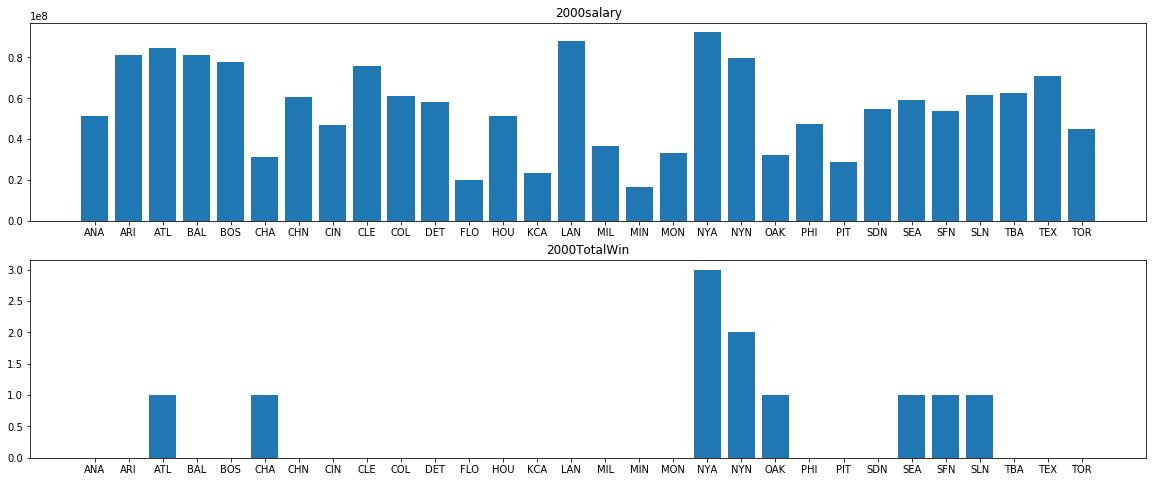

In [51]:
for year in [1994,2000]:
    cleanDF = salaryTeamTotalWinCleanDF.groupby(['yearID']).get_group(year)
    fig, axes = plt.subplots(2,1,figsize=(20,8))
    axes[0].bar(cleanDF['teamID'],cleanDF['salary'])
    axes[0].set_title(str(year)+'salary')
    axes[1].bar(cleanDF['teamID'],cleanDF['TotalWin'])
    axes[1].set_title(str(year)+'TotalWin')
    #plt.savefig('salaryWin'+str(year)+'.svg')


# Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

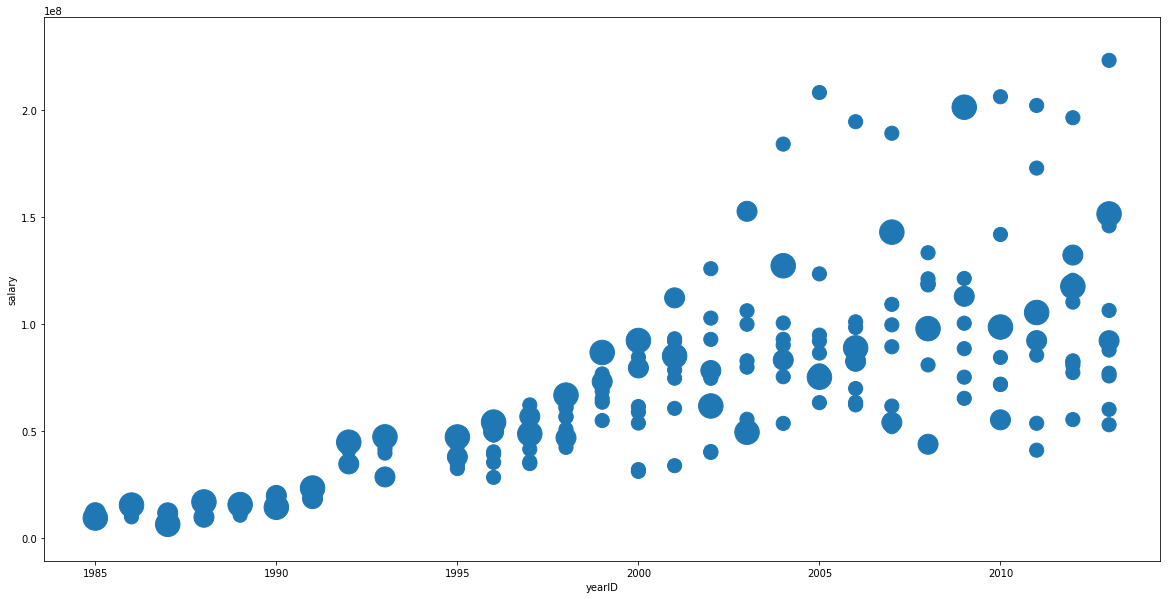

In [58]:
salaryTeamTotalWinCleanDF.plot.scatter(x='yearID',y='salary',s=salaryTeamTotalWinCleanDF['TotalWin']*200,figsize=(20,10))

In [100]:
salary_median = []
for year in years:
    STTWCDF = salaryTeamTotalWinCleanDF.iloc[0:0,:]
    temp = salaryTeamTotalWinCleanDF.groupby(['yearID']).get_group(year)
    STTWCDF = temp.append(temp)
    salary_median.append(STTWCDF['salary'].median())

In [99]:
print(STTWCDF)
salary_median
#中位数是计算出来的，在原数据中不一定存在

     yearID teamID     salary  TotalWin
798    2013    ARI   90132000       0.0
799    2013    ATL   87871525       1.0
800    2013    BAL   84393333       0.0
801    2013    BOS  151530000       3.0
802    2013    CHA  120065277       0.0
803    2013    CHN  100567726       0.0
804    2013    CIN  106404462       1.0
805    2013    CLE   75771800       1.0
806    2013    COL   74409071       0.0
807    2013    DET  145989500       1.0
808    2013    HOU   17890700       0.0
809    2013    KCA   80091725       0.0
810    2013    LAA  124174750       0.0
811    2013    LAN  223362196       1.0
812    2013    MIA   33601900       0.0
813    2013    MIL   76947033       0.0
814    2013    MIN   75337500       0.0
815    2013    NYA  231978886       0.0
816    2013    NYN   49448346       0.0
817    2013    OAK   60132500       1.0
818    2013    PHI  169863189       0.0
819    2013    PIT   77062000       1.0
820    2013    SDN   65585500       0.0
821    2013    SEA   74005043       0.0


[10059008.5,
 11485429.5,
 11290014.5,
 12333083.5,
 14578917.0,
 17590786.0,
 23145583.5,
 30587250.0,
 33873166.5,
 33049798.5,
 34375642.5,
 33697750.0,
 41847997.0,
 42469917.0,
 49773187.0,
 56543083.5,
 63998000.0,
 61107577.0,
 68979833.5,
 62319083.5,
 66191416.5,
 71975291.0,
 84616816.5,
 79953782.5,
 81058733.0,
 84325333.0,
 86556646.0,
 85513487.5,
 89001762.5]

In [86]:
salaryWinOaklandDF = salaryTeamTotalWinCleanDF.groupby(['teamID']).get_group('OAK')
salaryWinOaklandDF

,yearID,teamID,salary,TotalWin
17,1985,OAK,9058606,0.0
43,1986,OAK,9779421,0.0
69,1987,OAK,11680839,0.0
95,1988,OAK,9690000,2.0
121,1989,OAK,15613070,3.0
147,1990,OAK,19887501,2.0
173,1991,OAK,36999167,0.0
199,1992,OAK,41035000,1.0
227,1993,OAK,37812333,0.0
255,1994,OAK,34172500,0.0


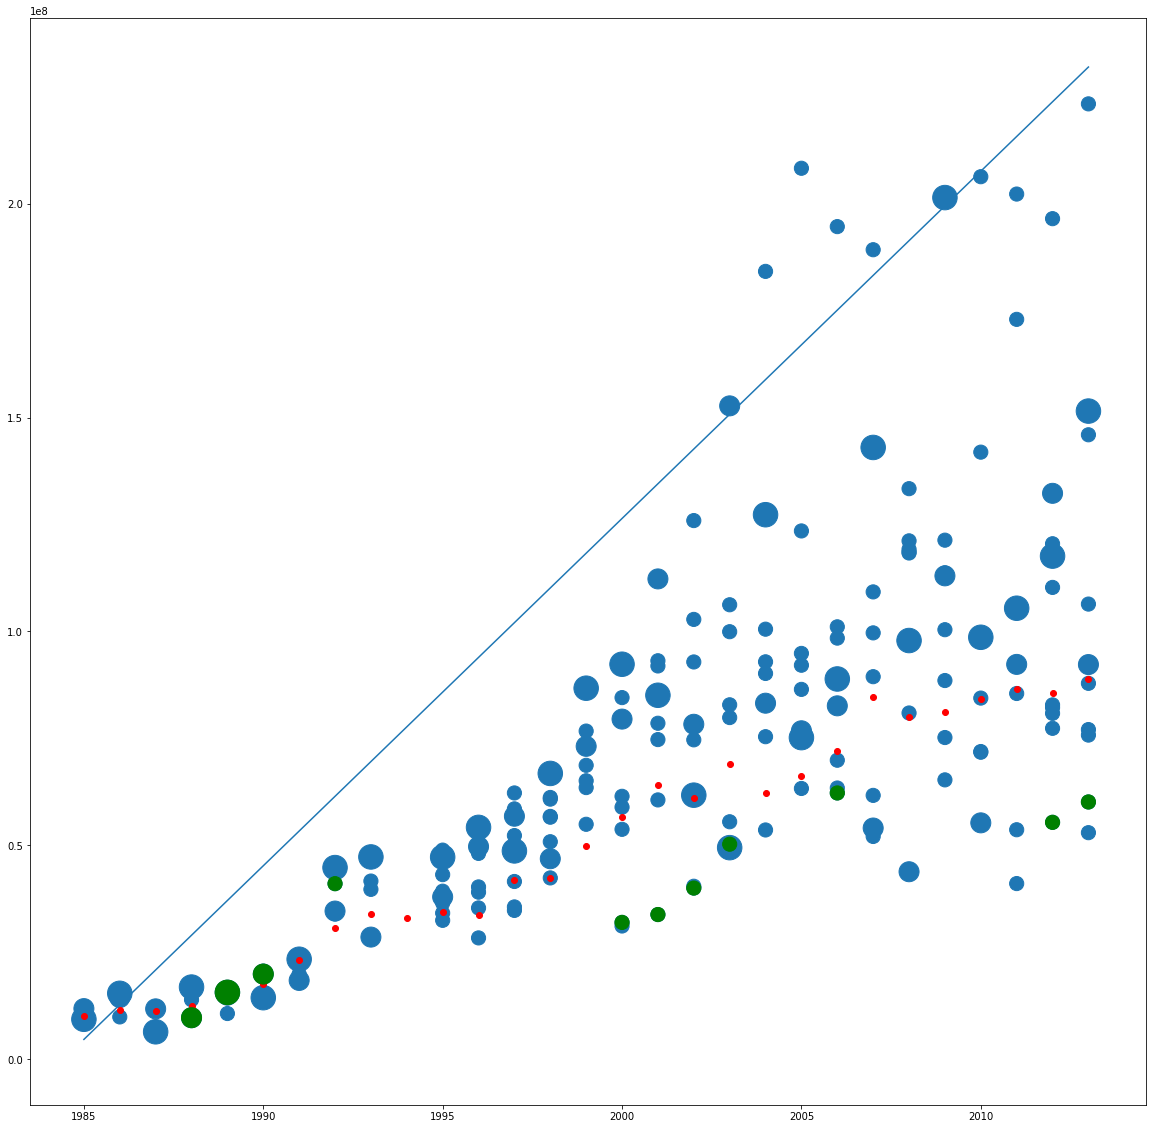

In [106]:
c = 227365886/28
b = 231978886 - (2013*227365886)/28
x = years
y = c*x+b
fig,ax = plt.subplots(figsize=(20,20))
x=years
ax.scatter(x=salaryTeamTotalWinCleanDF['yearID'],y=salaryTeamTotalWinCleanDF['salary'],s=salaryTeamTotalWinCleanDF['TotalWin']*200)
ax.plot(x,y)
ax.scatter(x,salary_median,color='red')
ax.scatter(x,salaryWinOaklandDF['salary'],s=salaryWinOaklandDF['TotalWin']*200,color='green')

#根据线性回归，Oakland球队在2003年左右具有较大的竞争能力，在这一年球队在投入相对其他球队较少的工资前提下，夺得了更多的奖杯。
#可以将x轴设置为1984年以后的年份，这样容易统计。


In [132]:
linearDF = salaryTeamTotalWinCleanDF.copy()
linearDF.loc[:,'yearID'] = linearDF.loc[:,'yearID'] - 1984


## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [625]:
countries = pd.read_csv('countries.csv')
countries.tail()
    

,Country,Region
189,Paraguay,SOUTH AMERICA
190,Peru,SOUTH AMERICA
191,Suriname,SOUTH AMERICA
192,Uruguay,SOUTH AMERICA
193,Venezuela,SOUTH AMERICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [463]:
incomePerPerson = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
incomePerPerson.tail()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
257,Zimbabwe,869.0,870.0,871.0,872.0,873.0,874.0,875.0,876.0,877.0,...,1629.0,1568.0,1286.0,1352.0,1484.0,1626.0,1750.0,1773.0,1773.0,1801.0
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,South Sudan,507.0,507.0,507.0,507.0,508.0,508.0,508.0,508.0,508.0,...,3455.0,3756.0,3776.0,3799.0,3838.0,3505.0,1810.0,1965.0,2574.0,3047.0
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36327.0,NaN,NaN,NaN,NaN


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [321]:
incomePerPersonT = incomePerPerson.T.copy()
cols = incomePerPersonT.iloc[0,:]
incomePerPersonTD = incomePerPersonT.iloc[1:,:].copy()
incomePerPersonTD.columns = cols
incomePerPersonTD.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN
1804,NaN,603,NaN,668,719,NaN,1206,628,NaN,757,...,NaN,NaN,887,NaN,670,873,NaN,508,NaN,NaN


# Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

<BarContainer object of 259 artists>

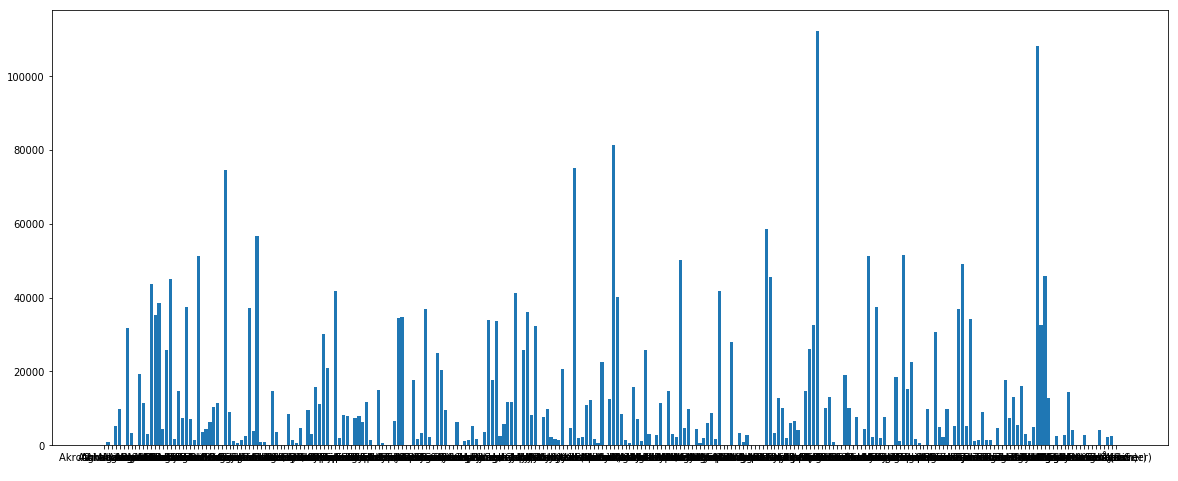

In [412]:
incomePerPersonTD_nan = incomePerPersonTD.copy()
incomePerPersonTD_nan = incomePerPersonTD_nan.fillna(0)#将值为nan的元素指定为0
#将列名为nan的列去除
incomePerPersonTD_nan_t = incomePerPersonTD_nan.iloc[:,:-3].copy()
fig, axe = plt.subplots(figsize=(20,8))
axe.bar(incomePerPersonTD_nan_t.columns,incomePerPersonTD_nan_t.T[2000] )

#incomePerPersonTD_nan_t.T[2000]


In [458]:
income = incomePerPersonTD_nan_t.copy()
print(countries.tail())
income.tail()
countriesFinal.T

       Country         Region
189   Paraguay  SOUTH AMERICA
190       Peru  SOUTH AMERICA
191   Suriname  SOUTH AMERICA
192    Uruguay  SOUTH AMERICA
193  Venezuela  SOUTH AMERICA


Country,Algeria,Angola,Benin,Botswana,Burkina,Burundi,Cameroon,Cape Verde,Central African Republic,Chad,...,Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela
Region,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,AFRICA,...,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA,SOUTH AMERICA


In [432]:
income.tail()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland
2011,0,1695.0,0,9640.0,12606.0,0,41958.0,7094.0,0,19988.0,...,0,4717.0,0,0,0,3761.0,0,3557.0,1626.0,0
2012,0,1893.0,0,9811.0,12779.0,0,41926.0,7230.0,0,20577.0,...,0,4912.0,0,0,0,3765.0,0,3678.0,1750.0,0
2013,0,1884.0,0,9961.0,12893.0,0,43735.0,7488.0,0,20353.0,...,0,5125.0,0,0,0,3832.0,0,3800.0,1773.0,0
2014,0,1877.0,0,10160.0,13179.0,0,44929.0,7546.0,0,20797.0,...,0,5370.0,0,0,0,3866.0,0,3898.0,1773.0,0
2015,0,1925.0,0,10620.0,13434.0,0,46577.0,7615.0,0,21049.0,...,0,5623.0,0,0,0,3887.0,0,4034.0,1801.0,0


In [487]:
temp = countries['Country'].copy()
countriesFinal = countries.copy()
countriesFinal.index = temp
del countriesFinal['Country']
CI = pd.concat([countriesFinal.T,income],sort=True)
CI.head()

,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,West Germany,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe,Åland
Region,NaN,ASIA,NaN,EUROPE,AFRICA,NaN,EUROPE,AFRICA,NaN,NORTH AMERICA,...,NaN,NaN,NaN,NaN,NaN,ASIA,NaN,AFRICA,AFRICA,NaN
1800,0.0,603,0.0,667,716,0.0,1197,618,0.0,757,...,0.0,0.0,1220.0,0.0,0.0,877,0.0,663,869,0.0
1801,0.0,603,0.0,667,716,0.0,1199,620,0.0,757,...,0.0,0.0,1221.0,0.0,0.0,879,0.0,665,870,0.0
1802,0.0,603,0.0,668,717,0.0,1201,623,0.0,757,...,0.0,0.0,1221.0,0.0,0.0,882,0.0,667,871,0.0
1803,0.0,603,0.0,668,718,0.0,1204,626,0.0,757,...,0.0,0.0,1221.0,0.0,0.0,884,0.0,668,872,0.0


In [548]:
#删除没有Income数据的列
#运行一次就可以，再运行会因为查找不到元素报错
cols = CI.T.groupby([2015]).get_group(0).index.copy()
for col in cols:
    del CI[col]

In [549]:
#删除漏网之鱼，Vatican City国家的income值为NaN,上一行代码只消除了值为0的
del CI['Vatican City']

In [641]:
#将新的CI,deep copy给一个新的DataFrame（CI_Nonull）,防止后续的操作污染前面的数据
CI_Nonull = CI.copy()
CI_Nonull.iloc[0:1,:] = CI.iloc[0:1,:].fillna('noRegion').values
#CI_Nonull.head()
CI_Nonull

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Region,ASIA,EUROPE,AFRICA,EUROPE,AFRICA,NORTH AMERICA,SOUTH AMERICA,EUROPE,noRegion,OCEANIA,...,NORTH AMERICA,SOUTH AMERICA,ASIA,OCEANIA,SOUTH AMERICA,ASIA,noRegion,ASIA,AFRICA,AFRICA
1800,603,667,716,1197,618,757,1507,514,833,815,...,2128,1758,502,585,682,861,1220,877,663,869
1801,603,667,716,1199,620,757,1508,514,833,816,...,2168,1758,502,586,682,861,1221,879,665,870
1802,603,668,717,1201,623,757,1508,514,833,818,...,2203,1758,502,586,682,861,1221,882,667,871
1803,603,668,718,1204,626,757,1508,514,833,820,...,2167,1759,502,586,682,861,1221,884,668,872
1804,603,668,719,1206,628,757,1508,514,833,822,...,2166,1759,503,586,682,861,1221,887,670,873
1805,603,668,720,1208,631,757,1508,514,833,824,...,2211,1759,503,586,682,862,1221,889,671,874
1806,603,668,721,1210,634,757,1509,514,833,826,...,2252,1759,503,586,683,862,1222,892,673,875
1807,603,668,722,1212,637,758,1509,514,834,828,...,2274,1760,503,586,683,862,1222,894,675,876
1808,603,668,723,1215,640,758,1509,514,834,830,...,2115,1760,503,586,683,862,1222,897,676,877


In [670]:
#把CI中含有NaN的列删除组成新的DataFrame命名为CI_Nonull，用groupby('Region')get_group(NaN)---这个方法无法查找，需要转换nan为0，
#再get_group(0)，将其del的到
#将CI_Nonull.columns赋值给df['Coutry'],将CI_Nonull.loc[['Region'],:]的值赋予df['Region'],years=np.arange(1800,2016)
#用for循环将CI_Nonull中指定年份的各个国家income取出来，赋予CI_Nonull['Income'],
#由此得到新的DataFrame：CI_Nonull_new,即为mergeByYear(year)
CI_Nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Region to 2015
Columns: 220 entries, Afghanistan to Zimbabwe
dtypes: object(220)
memory usage: 384.7+ KB


In [611]:
'''mergeByYear算法
CRI = pd.DataFrame(0,index=np.arange(220),columns=['Country','Region','Income'])
CRI['Country'] = CI_Nonull.columns.copy()
CRI['Region'] = CI_Nonull.T['Region'].values.copy()#CI_Nonull.loc[['Region'],:]赋值给列为什么值是NaN？Because数据格式不对
#CI_Nonull.loc[['Region'],:]是CI_Nonull里‘Region’行的所有列。行列转换后，取Region的值赋给CRI['Region']即可。
years = np.arange(1800,2016)
CRI['Income'] = CI_Nonull.T[2015].values.copy()
'''

,Country,Region,Income
0,Afghanistan,ASIA,1925
1,Albania,EUROPE,10620
2,Algeria,AFRICA,13434
3,Andorra,EUROPE,46577
4,Angola,AFRICA,7615


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [616]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
def mergeByYear(year):
    CRI = pd.DataFrame(0,index=np.arange(220),columns=['Country','Region','Income'])
    CRI['Country'] = CI_Nonull.columns.copy()
    CRI['Region'] = CI_Nonull.T['Region'].values.copy()#CI_Nonull.loc[['Region'],:]
    CRI['Income'] = CI_Nonull.T[year].values.copy()
    return CRI

mergeByYear(2000).head()     

,Country,Region,Income
0,Afghanistan,ASIA,962
1,Albania,EUROPE,5305
2,Algeria,AFRICA,9885
3,Andorra,EUROPE,31662
4,Angola,AFRICA,3387


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [691]:
CRI2010 = mergeByYear(2010).copy()
#CRI2010.groupby(['Region'], as_index=False).agg({'Income' : np.max})
t = CRI2010.iloc[:,1:].groupby(['Region']).get_group('EUROPE').copy()
t1 = CRI2010.iloc[:,1:].groupby(['Region']).get_group('ASIA').copy()
#fig, axe = plt.subplots(figsize=(20,8))

#axe.hist(a)

In [704]:
plt.figure()
df = CRI2010.loc[:,['Region','Income']]
#df.boxplot(by='Region')

<Figure size 432x288 with 0 Axes>

       Col1      Col2  x
0  0.741670  0.980737  A
1  0.725397  0.745162  A
2  0.074448  0.019693  A
3  0.834613  0.021838  A
4  0.968337  0.493946  A
5  0.824485  0.007999  B
6  0.875068  0.677689  B
7  0.758472  0.938335  B
8  0.962632  0.850963  B
9  0.164338  0.166522  B


<Figure size 432x288 with 0 Axes>

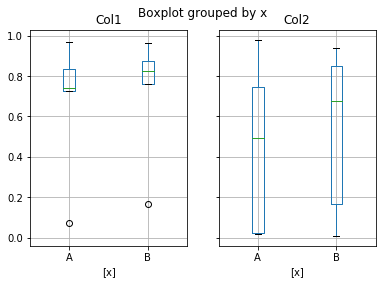

In [696]:
df = pd.DataFrame(np.random.rand(10,2),columns=['Col1','Col2'])
df['x'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
print(df)
plt.figure()
bp = df.boxplot(by='x')

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [713]:
from scipy import stats
scipy.stats

<module 'scipy.stats' from '/anaconda3/lib/python3.6/site-packages/scipy/stats/__init__.py'>

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [14]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [15]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
